In [2]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [36]:
# disjoint set union
class DSU:
    def __init__(self, nodes):
        # each node is its own parent
        self.parent = {node: node for node in nodes}
    
    def find(self, x):
        # used to return root parent of node x
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  
        return self.parent[x]

    def union(self, x, y):
        xr, yr = self.find(x), self.find(y)
        if xr == yr:     # checking if both are in same set 
            return False  
        self.parent[yr] = xr
        return True

In [37]:
def kruskal(locations, routes):
    dsu = DSU(locations)
    mst = []
    total_cost = 0

    routes.sort()  # sort by cost
        
    for cost, u, v in routes:
        if dsu.union(u, v):
            mst.append((u, v, cost))
            total_cost += cost
            
    return mst, f'Total cost :{total_cost}'   


In [38]:
locations = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad']
routes = [
    (45322, 'Delhi', 'Mumbai'),
    (25678, 'Delhi', 'Bangalore'),
    (15070, 'Mumbai', 'Bangalore'),
    (79800, 'Mumbai', 'Kolkata'),
    (33497, 'Bangalore', 'Chennai'),
    (25669, 'Chennai', 'Kolkata'),
    (48990, 'Chennai', 'Hyderabad'),
    (17800, 'Kolkata', 'Hyderabad'),
]
kruskal(locations,routes)
print("Minimum Spanning Tree:")
for u, v, cost in mst:
    print(f'{u} - {v} : ₹{cost}')
print(f'Total Minimum Cost: ₹{total_cost}\n')

Minimum Spanning Tree:
Mumbai - Bangalore : ₹15070
Kolkata - Hyderabad : ₹17800
Chennai - Kolkata : ₹25669
Delhi - Bangalore : ₹25678
Bangalore - Chennai : ₹33497
Total Minimum Cost: ₹117714



In [42]:
import networkx as nx

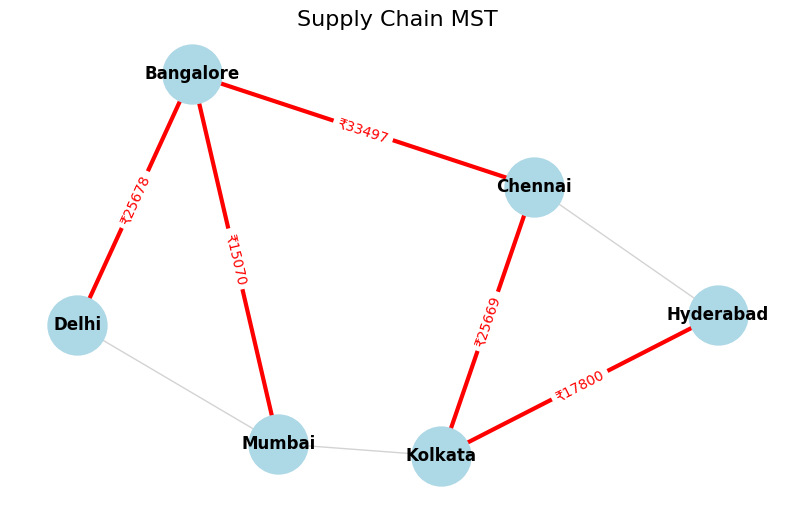

In [43]:
# plotting graph

G = nx.Graph()
for cost, u, v in routes:
    G.add_edge(u, v, weight=cost)

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 6))

# Draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1800)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw all edges in light gray (for background context)
all_edges = [(u, v) for _, u, v in routes]
nx.draw_networkx_edges(G, pos, edgelist=all_edges, edge_color='lightgray', width=1)

# Draw MST edges in red
mst_edges = [(u, v) for u, v, cost in mst]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=3)

# Draw MST edge labels (fares)
mst_edge_labels = {(u, v): f"₹{cost}" for u, v, cost in mst}
nx.draw_networkx_edge_labels(G, pos, edge_labels=mst_edge_labels, font_color='red', font_size=10)

plt.title("Supply Chain MST", fontsize=16)
plt.axis('off')
plt.show()